In [87]:
import numpy as np
import os, glob
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import animation
from matplotlib import cm
import pandas as pd
import math
from astropy.io import fits
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

### Calculate the width of the PSF 

In [88]:
NA = 0.4                # Numerical Aperture
n = 1.515               # Refraction Index
Lambda_e = 665          # Emission Wavelength (nm)
pixel_size = 66.67      # (nm)

In [89]:
r = 0.61*Lambda_e/NA    # Radius of PSF 

In [90]:
r/pixel_size

15.211114444277785

In [43]:
alfa = math.asin(NA/n)

In [44]:
sigma_ref = (Lambda_e/(2*np.pi*n))*math.sqrt((7*(1-math.cos(alfa)**1.5))/
                                             (4-7*math.cos(alfa)**1.5+3*math.cos(alfa)**3.5))   # (nm)

### Max A.D.U Values

In [104]:
image_files = glob.glob(os.path.abspath(os.path.normpath(os.path.join(os.getcwd(),'EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_*.fits'))))

In [105]:
image_files = sorted(image_files)

In [106]:
image_files

['/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_00.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_01.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_02.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_03.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_04.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_05.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_06.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_07.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_08.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENTAL_DATA_HARAN/R5_TCR_FM143fx_ex642_va899_00um_09.fits']

In [107]:
Bright_image = os.path.abspath(os.path.normpath(os.path.join(os.getcwd(),'EXPERIMENTAL_DATA_HARAN/bright_image_01.fits')))
Dark_image = os.path.abspath(os.path.normpath(os.path.join(os.getcwd(),'EXPERIMENTAL_DATA_HARAN/Dark_image_01.fits')))

In [108]:
image_data = []
for i in range(len(image_files)):
    image_data.append(fits.getdata(image_files[i]))

In [109]:
image_data = np.vstack(image_data)

In [110]:
image_data = image_data[15000:,:,:]

In [111]:
np.shape(image_data)

(15000, 256, 256)

In [112]:
df = np.max(image_data,axis=0)

In [113]:
np.shape(df)

(256, 256)

In [114]:
LocMicrovili = np.genfromtxt('EXPERIMENTAL_DATA_HARAN/LocMicrovili.txt',delimiter=',',dtype=int,skip_header=1)

In [143]:
LocMicrovili[239,83]

1

In [142]:
np.where(LocMicrovili==1)

(array([ 47,  47,  48,  48,  48,  48,  49,  49,  49,  50,  80,  81,  81,
         81,  82,  82,  82,  82,  82,  82,  83,  83,  83,  83,  83,  83,
         83,  83,  84,  84,  84,  84,  85,  90,  91,  91,  91,  92, 106,
        107, 107, 107, 108, 108, 108, 108, 109, 109, 109, 109, 110, 110,
        110, 110, 110, 110, 111, 111, 111, 116, 117, 117, 117, 118, 134,
        134, 135, 135, 135, 135, 135, 135, 135, 136, 136, 136, 136, 136,
        136, 136, 137, 137, 137, 137, 137, 138, 138, 138, 138, 138, 139,
        139, 139, 139, 139, 140, 140, 140, 140, 140, 141, 141, 141, 141,
        141, 141, 141, 141, 142, 142, 142, 142, 142, 142, 142, 143, 143,
        143, 143, 143, 144, 144, 144, 144, 144, 145, 145, 145, 145, 146,
        146, 147, 147, 147, 148, 148, 148, 148, 148, 148, 149, 149, 149,
        149, 149, 149, 149, 149, 150, 150, 150, 150, 150, 150, 150, 151,
        151, 151, 151, 151, 151, 151, 151, 151, 152, 152, 152, 152, 152,
        152, 152, 152, 153, 153, 153, 153, 154, 154

In [139]:
np.where(LocMicrovili==1)[1][250]

237

In [117]:
loc = dict()

In [118]:
loc = {(i,j):((i+0.33,j+3.84) if LocMicrovili[i,j]==1 else (i,j)) for i in range(256) for j in range(256)}

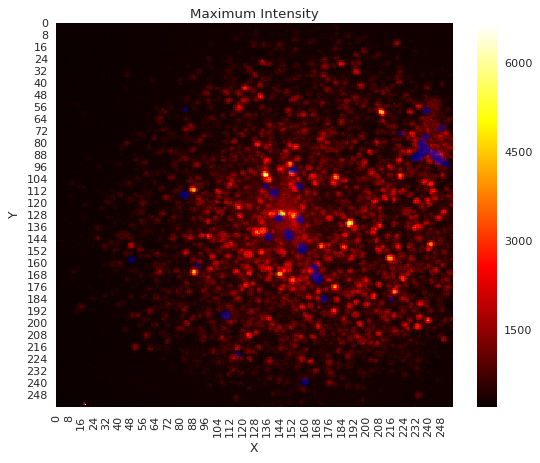

In [119]:
fig = plt.figure() 
ax = sns.heatmap(df.T,cmap='hot')
for i in range(256):
    for j in range(256):
        if LocMicrovili[i,j]==1:
            plt.scatter(loc[(i,j)][0],loc[(i,j)][1],alpha=0.1,c='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Maximum Intensity')
fig.savefig('Maximum_Intensity.pdf')

### Crop Signals

In [120]:
dark_image = fits.getdata(Dark_image)

In [121]:
d_avg_c_f = np.mean(dark_image, axis=(0,2))   # (256,1)
d_avg_r_f = np.mean(dark_image, axis=(0,1))   # (1,256)

In [122]:
W_off_mean = np.mean(dark_image)
offset = W_off_mean-d_avg_c_f.reshape(256,1)-d_avg_r_f.reshape(1,256)

In [123]:
for j in range(image_data.shape[0]):
    image_data[j] = image_data[j]+offset 

In [145]:
def plot_trace(image_data,i,j):
    island = image_data[:,i-15:i+15,j-15:j+15]
    trace_final = np.sum(island,axis=(1,2))
    fig = plt.figure(figsize=(4,4)) 
    ax = plt.plot(trace_final)
    plt.xlabel('Time')
    plt.ylabel('Intensity')
#     plt.xlim([500,800])
    plt.xticks(rotation=90)   
    plt.gcf().subplots_adjust(bottom=0.25,left=0.25)
    name = 'Time_trace_pixel_{}_{}.pdf'.format(i,j)
    fig.savefig(name)
    return pd.DataFrame(trace_final)

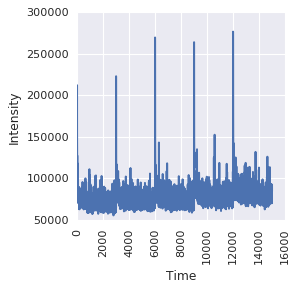

In [146]:
trace = plot_trace(image_data,239,83)

In [147]:
trace.to_csv('trace_exp_239_83.csv')